# Libraries

In [677]:
import pickle
import pandas as pd
import spacy
from tqdm.notebook import tqdm
import numpy as np
import warnings
import datetime as dt

from collections import Counter
from scipy.stats import chi2_contingency

from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
import gensim

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns

https://jveerbeek.gitlab.io/dm-manual/

# Import

In [480]:
N_TOPICS = 50
NOUNS_ONLY = False
N_ITERATIONS = 10000


if NOUNS_ONLY == False:
    NOUNS_ONLY = ""
if NOUNS_ONLY == True:
    NOUNS_ONLY = "_nouns"

In [481]:
lda = LdaMallet.load(f"Models/lda_{N_TOPICS}t_{N_ITERATIONS}i{NOUNS_ONLY}")
top_10 = []
for topic in range(N_TOPICS):
    words = lda.show_topic(topic, 10)
    topic_n_words = ', '.join([word[0] for word in words])
    temp_top_10 = 'Topic {}: {}'.format(str(topic), topic_n_words)
    top_10.append(temp_top_10)
#     print(temp_top_10)
topic_columns = ["topic_"+str(i) for i in range(N_TOPICS)]

In [482]:
data = pd.read_csv(f"Data/binary_topics_{N_TOPICS}t_{N_ITERATIONS}i{NOUNS_ONLY}.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()

,date,id,tweet,sentiment,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,2020-03-20,1.240728e+18,Many ask us how they can support us during all...,0.136364,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2020-03-20,1.240728e+18,We wish that ceramic coating protected us from...,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-03-20,1.240728e+18,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,0.275000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-20,1.240729e+18,"Day 3.... Corona-0, QueRona-3! Workout complet...",0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020-03-20,1.240729e+18,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,-0.137879,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot functions

In [554]:
def get_topic_proportion(data, topic, rolling=1):
    topic_proportion = data[["date", topic]].groupby("date", sort=False)[topic].mean()
    rolling_topic_proportion = topic_proportion.rolling(rolling).mean().reset_index(drop=True)
    return rolling_topic_proportion

def get_topic_sentiment_mean(data, topic, rolling=1):
    topic_sentiment_mean = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).mean()
    rolling_topic_sentiment_mean = topic_sentiment_mean.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_mean

def get_topic_sentiment_std(data, topic, rolling=1):
    topic_sentiment_std = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).std()
    rolling_topic_sentiment_std = topic_sentiment_std.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_std

def get_dates(data, topic):
    date = data[["date", topic]].groupby("date", sort=False)[topic].mean().reset_index()["date"]
    return date

def plot_topic(data, topic, rolling=1, fontsize_y=8, dateformat="month", title=None):
    topic_proportion = get_topic_proportion(data, topic, rolling)
    topic_sentiment_mean = get_topic_sentiment_mean(data, topic, rolling)
    topic_sentiment_std = get_topic_sentiment_std(data, topic, rolling)
    date = get_dates(data, topic)
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
    if title == None:
        fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
    else:
        fig.suptitle(title, fontsize=14)
    sns.lineplot(ax=axes[0], 
                 x=date, 
                 y=topic_proportion, 
                 sort=False,
                 ci=None)
    axes[0].set_ylabel("proportion", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[1], 
                 x=date, 
                 y=topic_sentiment_mean, 
                 sort=False,
                 color="green",
                 ci=None)
    axes[1].set_ylabel("sentiment mean", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[2], 
                 x=date, 
                 y=topic_sentiment_std, 
                 sort=False,
                 color="red",
                 ci=None)
    axes[2].set_ylabel("sentiment std", fontsize=fontsize_y, rotation=90)
    axes[2].set_xlabel(None)
    fig.autofmt_xdate()
    if dateformat == "month":
        dateformat = "%b-%Y"
    if dateformat == "day":
        dateformat = "%d-%b-%Y"
    date_format = mpl_dates.DateFormatter(dateformat)
    axes[2].xaxis.set_major_formatter(date_format)
    plt.show()

# PLOT

topics:
- 1 - family
- 13 - business
- 17 - stay home
- 26 - school
- 29 - vaccine and testing
- 33 - work from home
- 36 - voting, trump, BLM
- 41 - close opening restaurant reopen
- 43 - social distancing

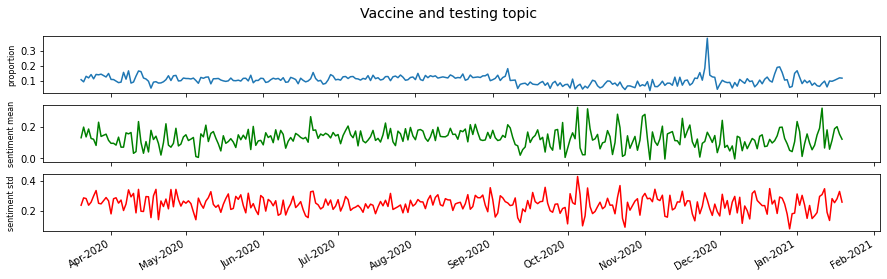

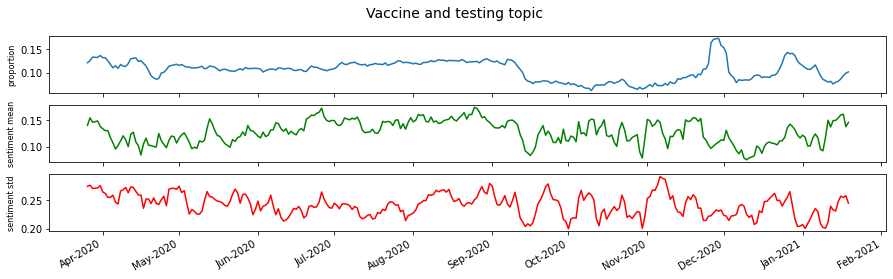

In [555]:
i = 1
topic = f"topic_{i}"
title = "Vaccine and testing topic"
plot_topic(data, topic, title=title)
plot_topic(data, topic, title=title, rolling=7)

<ipython-input-550-929127fb35ee>:61: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


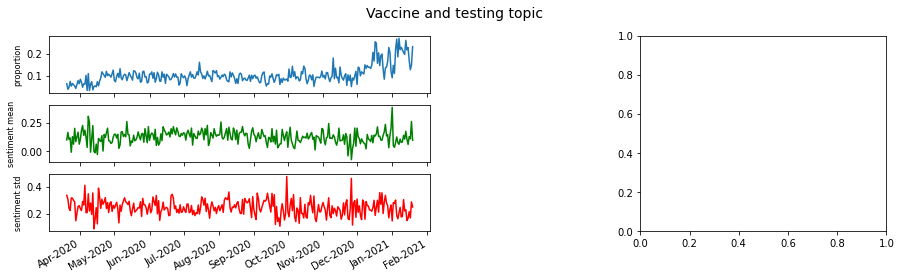

<ipython-input-550-929127fb35ee>:61: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


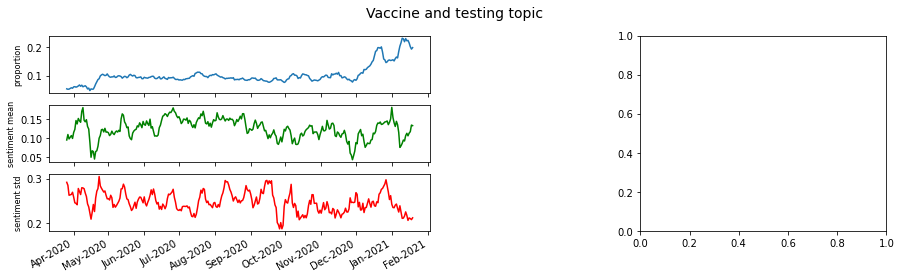

In [552]:
i = 29
topic = f"topic_{i}"
title = "Vaccine and testing topic"
plot_topic(data, topic, title=title)
plot_topic(data, topic, title=title, rolling=7)

# EVENT ANALYSIS

In [906]:
i = 43
topic = f"topic_{i}"
start_date = "2020-06-01"
end_date = "2020-08-01"
event_data = data[(start_date<data["date"]) & (data["date"]<end_date)]

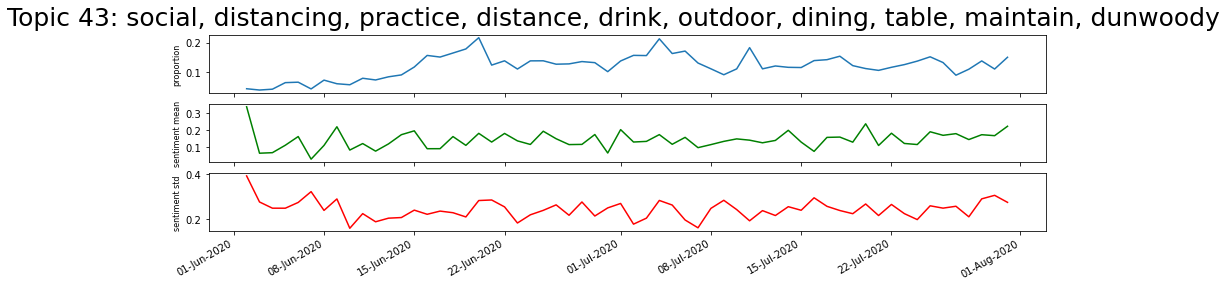

In [907]:
plot_topic(event_data, topic, dateformat="day")
# plot_topic(event_data, f"topic_{i}", rolling=7, dateformat="day")

### Preprocess

In [908]:
event_topic = event_data[event_data[topic]==1]

nlp = spacy.load("en_core_web_sm")
docs = [post for post in tqdm(nlp.pipe(event_topic["tweet"], disable=["ner", "parser"]))]


lemmas = [[t.lemma_ for t in doc if not t.is_punct and not t.is_stop and t.pos_ in ["NOUN", "ADJ"]] for doc in tqdm(docs)] 

event_topic["docs"]=docs
event_topic["lemmas"]=lemmas
# event_topic.head()

<ipython-input-908-18d6c86c0ff5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_topic["docs"]=docs
<ipython-input-908-18d6c86c0ff5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_topic["lemmas"]=lemmas


In [909]:
# event_topic = event_topic[event_topic["sentiment"] != 0]

In [910]:
event_topic["sentiment"].describe()

count    4239.000000
mean        0.145679
std         0.244661
min        -1.000000
25%         0.000000
50%         0.084545
75%         0.287302
max         1.000000
Name: sentiment, dtype: float64

In [911]:
event_sentiment_25 = event_topic["sentiment"].describe()["25%"]
event_sentiment_75 = event_topic["sentiment"].describe()["75%"]
event_p_sentiment = event_topic[event_topic["sentiment"]>event_sentiment_75]
event_n_sentiment = event_topic[event_topic["sentiment"]<event_sentiment_25]
event_p_sentiment_lemmas = list(event_p_sentiment["lemmas"])
event_n_sentiment_lemmas = list(event_n_sentiment["lemmas"])

In [912]:
len(event_p_sentiment)

1060

In [913]:
len(event_n_sentiment)

632

In [914]:
event_p_sentiment_lemmas[:1]

[['family', 'social', 'distancing', 'hand', 'hygiene', 'step', 'infection']]

### Most frequent words positive

In [915]:
flatten = lambda t: [item for sublist in t for item in sublist]

In [916]:
event_p_sentiment_lemmas_flat = flatten(event_p_sentiment_lemmas)
word_counts_p = Counter(event_p_sentiment_lemmas_flat)
word_counts_p.most_common()[:20]

[('social', 717),
 ('distancing', 622),
 ('mask', 170),
 ('day', 104),
 ('time', 102),
 ('good', 87),
 ('pandemic', 81),
 ('outdoor', 75),
 ('safe', 67),
 ('open', 63),
 ('amp', 61),
 ('today', 58),
 ('distance', 50),
 ('new', 50),
 ('covid19', 49),
 ('space', 45),
 ('people', 43),
 ('tonight', 43),
 ('hand', 42),
 ('table', 42)]

In [917]:
event_n_sentiment_lemmas_flat = flatten(event_n_sentiment_lemmas)
word_counts_n = Counter(event_n_sentiment_lemmas_flat)
word_counts_n.most_common()[:20]

[('social', 421),
 ('distancing', 362),
 ('mask', 104),
 ('day', 61),
 ('time', 53),
 ('pandemic', 53),
 ('amp', 51),
 ('good', 45),
 ('today', 44),
 ('great', 39),
 ('new', 39),
 ('outdoor', 37),
 ('open', 36),
 ('people', 35),
 ('family', 31),
 ('table', 30),
 ('safe', 30),
 ('covid19', 27),
 ('weekend', 27),
 ('dining', 26)]

In [918]:
word_counts_combined = word_counts_p + word_counts_n

In [919]:
def llr(counts_1, counts_2, word, prnt = True):
    
#     counts_1 = count_nouns(docs1)
    count_1_word = counts_1[word]
    count_1_total = sum(counts_1.values())
    count_1_other = count_1_total - count_1_word
    
    
#     counts_2 = count_nouns(docs2)
    count_2_word = counts_2[word]
    count_2_total = sum(counts_2.values())
    count_2_other = count_2_total - count_2_word
    
    llr, p_value,_,_ = chi2_contingency([[count_1_word, count_2_word], 
                  [count_1_other, count_2_other]],
                  lambda_='log-likelihood') # this specifies using the LL measure
    
    ratio = (count_1_word/count_1_total)/((count_2_word/count_2_total)+0.0000001)
    c = "c1" if ratio > 1 else "c2"
    
    if prnt == True: 
        print("c1")
        print(f"{word}:", count_1_word)
        print("other:", count_1_other)
        print("c2")
        print(f"{word}:", count_2_word)
        print("other:", count_2_other)
        print("Log-likelihood: ", llr)
        print("Occurs more in:", c)
    
    return [word, llr, c]

In [920]:
# llr(word_counts_p, word_counts_n, "vaccine", prnt = True)

In [921]:
llr_words = [(llr(word_counts_p, word_counts_n, word, prnt = False)) 
             for word in tqdm(word_counts_combined)]

In [922]:
df_combined = pd.DataFrame(llr_words, columns=["word", "llr", "corpus"])
df_combined.head()

,word,llr,corpus
0,family,1.491538,c2
1,social,0.175934,c1
2,distancing,0.272050,c1
3,hand,0.332886,c1
4,hygiene,0.072664,c1


In [923]:
df_p_top = df_combined.sort_values("llr", ascending=False)[df_combined["corpus"]=="c1"]
df_n_top = df_combined.sort_values("llr", ascending=False)[df_combined["corpus"]=="c2"]

<ipython-input-923-951c646dcf4f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_p_top = df_combined.sort_values("llr", ascending=False)[df_combined["corpus"]=="c1"]
<ipython-input-923-951c646dcf4f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n_top = df_combined.sort_values("llr", ascending=False)[df_combined["corpus"]=="c2"]


In [924]:
df_p_top.head(20)

,word,llr,corpus
165,▪,32.939745,c1
192,appointment,9.410888,c1
455,sure,4.483834,c1
1377,state,4.317130,c1
683,ceremony,4.317130,c1
345,class,3.871658,c1
225,video,3.802812,c1
1236,walk,3.764171,c1
48,space,3.763797,c1
249,shirt,3.511072,c1


In [925]:
positive_word_llr = list(zip(df_p_top.head(20)["word"], df_p_top.head(20)["llr"]))
negative_word_llr = list(zip(df_n_top.head(20)["word"], df_n_top.head(20)["llr"]))

In [926]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud

TOPIC2PLOT = 1
MAX_WORDS = 80

def black_circle():
    response = requests.get('https://i.ibb.co/kHNWRYD/black-circle-better.png')
    circle_mask = np.array(Image.open(BytesIO(response.content)))
    return circle_mask 

def plot_word_cloud(list_of_tuples):
    circle_mask = black_circle()
    wordcloud = WordCloud(background_color='#fff',
                          font_path='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
                        color_func=lambda *args, **kwargs: (0,0,0),
                         mask=circle_mask)
    wordcloud.generate_from_frequencies(frequencies=dict(list_of_tuples))

    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")

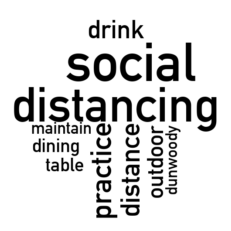

In [927]:
plot_word_cloud(lda.show_topic(i, 10))

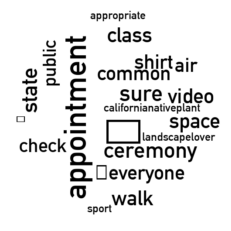

In [928]:
plot_word_cloud(positive_word_llr)

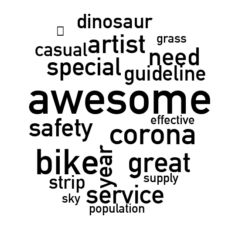

In [929]:
plot_word_cloud(negative_word_llr)

In [930]:
event_p_sentiment = event_topic[event_topic["sentiment"]>0] #event_sentiment_25
event_n_sentiment = event_topic[event_topic["sentiment"]<0] #event_sentiment_75

In [931]:
event_p_sentiment.groupby("date").sum().index

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
               '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
      

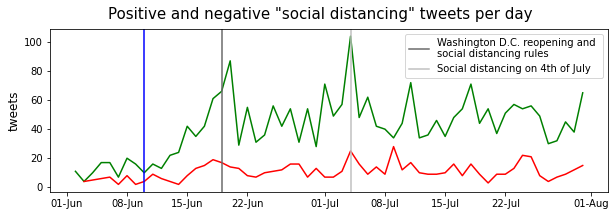

In [934]:
f = plt.figure(figsize=(10,3))
f.suptitle('Positive and negative "social distancing" tweets per day', fontsize=15)
ax = f.add_subplot()
ax.plot(event_p_sentiment.groupby("date")["tweet"].count(), c="green")
ax.plot(event_n_sentiment.groupby("date")["tweet"].count(), c="red")
# ax.plot(event_topic.groupby("date")["tweet"].count())
ax.axvline(x=dt.datetime(2020,6,19), c="dimgray", label="Washington D.C. reopening and \nsocial distancing rules")
ax.axvline(x=dt.datetime(2020,7,4), c="silver", label="Social distancing on 4th of July")
ax.axvline(x=dt.datetime(2020,6,10), c="blue")
dateformat = "%d-%b"
date_format = mpl_dates.DateFormatter(dateformat)
ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel("tweets", fontsize=12)
# plt.axvline(x="2020-12-11")
plt.legend()
plt.show()


In [933]:
def get_topic_proportion(data, topic, rolling=1):
    topic_proportion = data[["date", topic]].groupby("date", sort=False)[topic].mean()
    rolling_topic_proportion = topic_proportion.rolling(rolling).mean().reset_index(drop=True)
    return rolling_topic_proportion

def get_topic_sentiment_mean(data, topic, rolling=1):
    topic_sentiment_mean = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).mean()
    rolling_topic_sentiment_mean = topic_sentiment_mean.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_mean

def get_topic_sentiment_std(data, topic, rolling=1):
    topic_sentiment_std = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).std()
    rolling_topic_sentiment_std = topic_sentiment_std.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_std

def get_dates(data, topic):
    date = data[["date", topic]].groupby("date", sort=False)[topic].mean().reset_index()["date"]
    return date

def plot_topic(data, topic, rolling=1, fontsize_y=8, fontsize_title=25,  dateformat="month", title=None):
    topic_proportion = get_topic_proportion(data, topic, rolling)
    topic_sentiment_mean = get_topic_sentiment_mean(data, topic, rolling)
    topic_sentiment_std = get_topic_sentiment_std(data, topic, rolling)
    date = get_dates(data, topic)
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
    if title == None:
        fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=fontsize_title)
    else:
        fig.suptitle(title, fontsize=fontsize_title)
    sns.lineplot(ax=axes[0], 
                 x=date, 
                 y=topic_proportion, 
                 sort=False,
                 ci=None)
    axes[0].set_ylabel("proportion", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[1], 
                 x=date, 
                 y=topic_sentiment_mean, 
                 sort=False,
                 color="green",
                 ci=None)
    axes[1].set_ylabel("sentiment mean", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[2], 
                 x=date, 
                 y=topic_sentiment_std, 
                 sort=False,
                 color="red",
                 ci=None)
    axes[2].set_ylabel("sentiment std", fontsize=fontsize_y, rotation=90)
    axes[2].set_xlabel(None)
    fig.autofmt_xdate()
    if dateformat == "month":
        dateformat = "%b-%Y"
    if dateformat == "day":
        dateformat = "%d-%b-%Y"
    date_format = mpl_dates.DateFormatter(dateformat)
    axes[2].xaxis.set_major_formatter(date_format)
    plt.show()

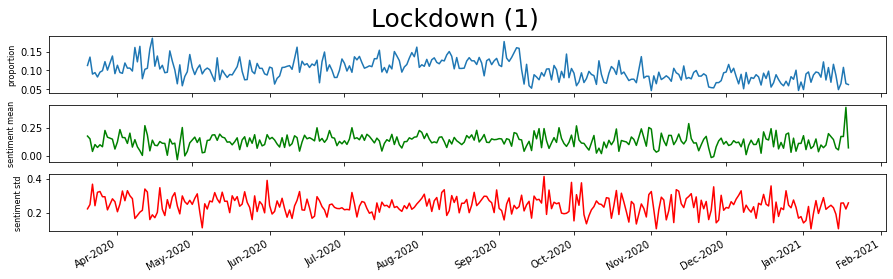

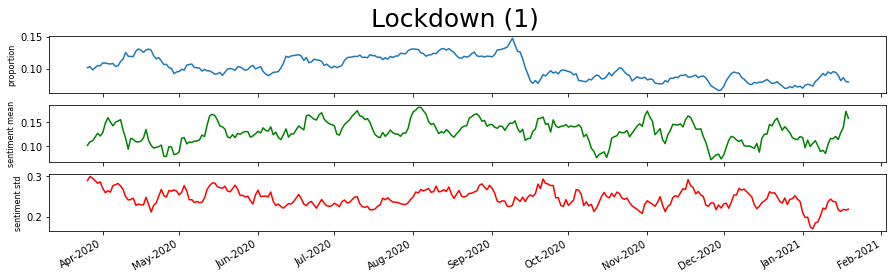

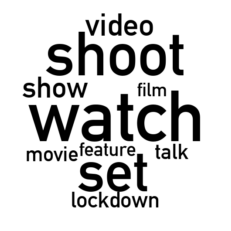

In [890]:
i = 30
topic = f"topic_{i}"
title = "Lockdown (1)"
plot_topic(data, topic, title=title)
plot_topic(data, topic, title=title, rolling=7)
plot_word_cloud(lda.show_topic(i, 10))

In [891]:
lda.show_topic(i, 10)

[('watch', 0.05320315928038613),
 ('shoot', 0.040807371654234315),
 ('set', 0.03482887231241773),
 ('video', 0.0347740236946029),
 ('show', 0.03208644142167617),
 ('lockdown', 0.028521281263712155),
 ('talk', 0.02676612549363756),
 ('movie', 0.026053093462044756),
 ('feature', 0.02314611671785871),
 ('film', 0.021829749890302765)]

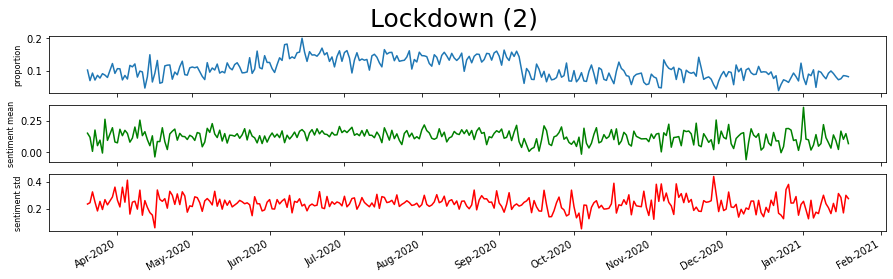

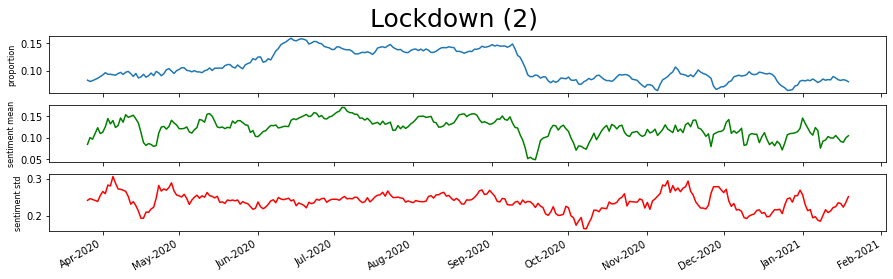

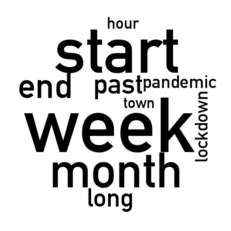

In [892]:
i = 14
topic = f"topic_{i}"
title = "Lockdown (2)"
plot_topic(data, topic, title=title)
plot_topic(data, topic, title=title, rolling=7)
plot_word_cloud(lda.show_topic(i, 10))

In [893]:
lda.show_topic(i, 10)

[('week', 0.19582483632070408),
 ('start', 0.13797359665128262),
 ('month', 0.13545132553397016),
 ('end', 0.05570462595255984),
 ('past', 0.03321884726843405),
 ('long', 0.02801330900504454),
 ('pandemic', 0.025652033916496727),
 ('lockdown', 0.025169045830202855),
 ('hour', 0.020768487710636472),
 ('town', 0.01894386605130407)]

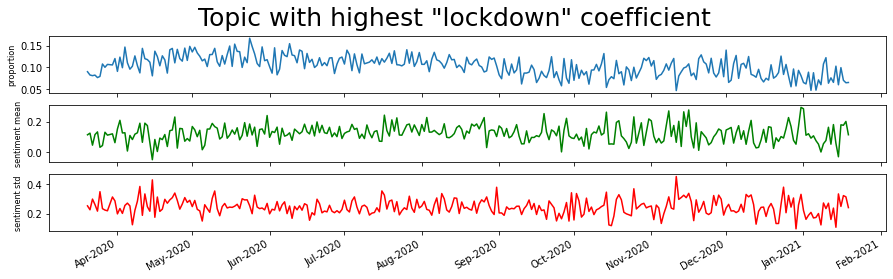

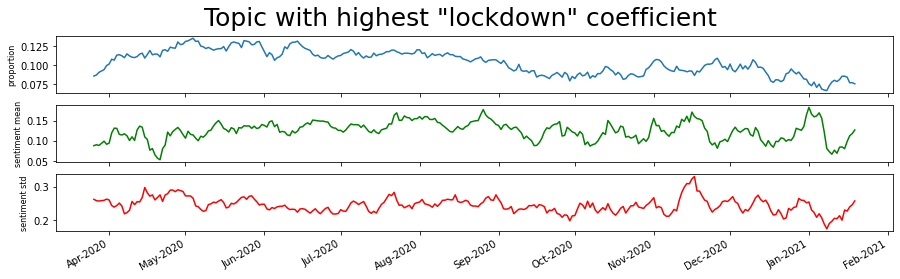

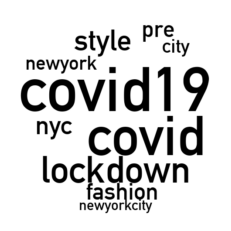

In [902]:
i = 28
topic = f"topic_{i}"
title = 'Topic with highest "lockdown" coefficient'#top_10[i][10:]
plot_topic(data, topic, title=title)
plot_topic(data, topic, title=title, rolling=7)#, fontsize_title=20)
plot_word_cloud(lda.show_topic(i, 10))

In [895]:
lda.show_topic(i, 10)

[('covid19', 0.12101840626033286),
 ('covid', 0.0943458613468533),
 ('lockdown', 0.08040339468753445),
 ('style', 0.04562989088504354),
 ('nyc', 0.03438774385539513),
 ('fashion', 0.028380910393475147),
 ('pre', 0.02689297916896286),
 ('newyork', 0.025294830816708917),
 ('city', 0.024688636614129837),
 ('newyorkcity', 0.018185826077372423)]

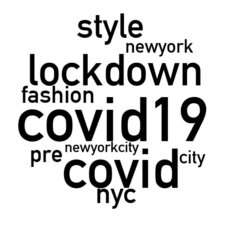

In [896]:
plot_word_cloud(lda.show_topic(28, 10))